# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **english**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 16th, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

The main topics of Laboratory 4 are:

**FirstPart: Template Matching and Image Descriptors**

    4.1) Euclidean distance and Normalized Cross-correlation for template matching

    4.2) HOG image descriptor for object (person) detection

**Second Part: Image matching**

    4.3) Recognition by correspondance, based on feature extraction (ORB)
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

Let us focus on ORB, an approximation of SIFT method, and analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

**3.1** Detect the censure in the image `starbucks4.jpg`. Analyze and discuss the effect of different values of the parameters in censure function.

In [6]:
from skimage import data
from skimage import transform
from skimage.feature import CENSURE
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage import io

In [7]:
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    
def visualize3WithFeatures(
    im1, detector1, label1,
    im2, detector2,label2,
    im3,detector3,label3
):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(im1, cmap='gray')
    plt.scatter(detector1.keypoints[:, 1], detector1.keypoints[:, 0],
              2 ** detector1.scales, facecolors='none', edgecolors='r')
    plt.xticks([])
    plt.yticks([])
    
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(im2, cmap='gray')
    plt.scatter(detector2.keypoints[:, 1], detector2.keypoints[:, 0],
              2 ** detector2.scales, facecolors='none', edgecolors='r')
    
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(im3, cmap='gray')
    plt.scatter(detector3.keypoints[:, 1], detector3.keypoints[:, 0],
              2 ** detector3.scales, facecolors='none', edgecolors='r')


def visualize4(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre2, cmap='gray')
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray')
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray')
    
    # In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)

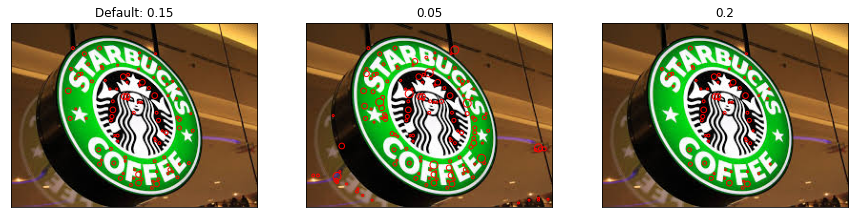

In [8]:
image = io.imread('images/starbucks4.jpg')
img_gr = rgb2gray(image)
detector1 = CENSURE()
detector1.detect(img_gr)

detector2 = CENSURE(non_max_threshold=0.05)
detector2.detect(img_gr)

detector3 = CENSURE(non_max_threshold=0.2)
detector3.detect(img_gr)

visualize3WithFeatures(
    image, detector1, "Default: 0.15",
    image, detector2, "0.05",
    image, detector3, "0.2"
)

non_max_threshold parameter, defines the threshold value used to suppress maximas and minimas with a weak magnitude response obtained after Non-Maximal Suppression. We can see that when the threshold is larger, there are less feature detected.

**3.2** Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks4.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. 

Define a function get_ORB implementing the algorithm in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

Analyze and discuss the effect of different values of the parameter `max_ratio` in the match_descriptors function.


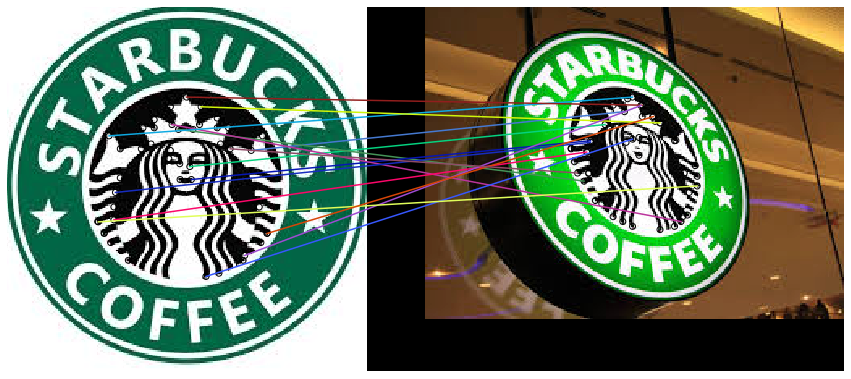

In [9]:
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)

def get_ORB(image1, image2, n_keypoints=50):
    
    image1 = rgb2gray(image1)
    image2 = rgb2gray(image2)
    
    descriptor_extractor = ORB(n_keypoints=n_keypoints)

    descriptor_extractor.detect_and_extract(image1)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors

    descriptor_extractor.detect_and_extract(image2)
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors
    
    matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True) #analize max_ratio
    
    return (keypoints1, keypoints2, matches12, descriptors1, descriptors2)

def plot_matches(image1, image2, keypoints1, keypoints2, matches):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
    plt.gray()
    plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches)
    ax.axis('off')

    plt.show()
    return


image_model = io.imread("images/starbucks.jpg")
keypoints1, keypoints2, matches, desc1, desc2 = get_ORB(image_model, image, n_keypoints=45)
plot_matches(image_model, image, keypoints1, keypoints2, matches)

Repeate the experiment comparing the `starbucks.jpg` image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

(201, 200, 4)
0.2987012987012987
0.2987012987012987
0.28205128205128205
0.26582278481012656
0.19047619047619047
Similarity distance best match 


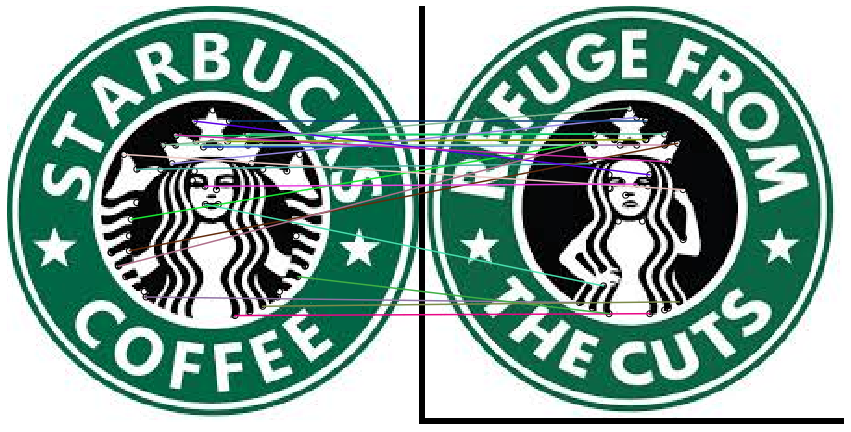

1.0
1.2380952380952381
1.4090909090909092
1.434782608695652
1.75
Hamming distances best match


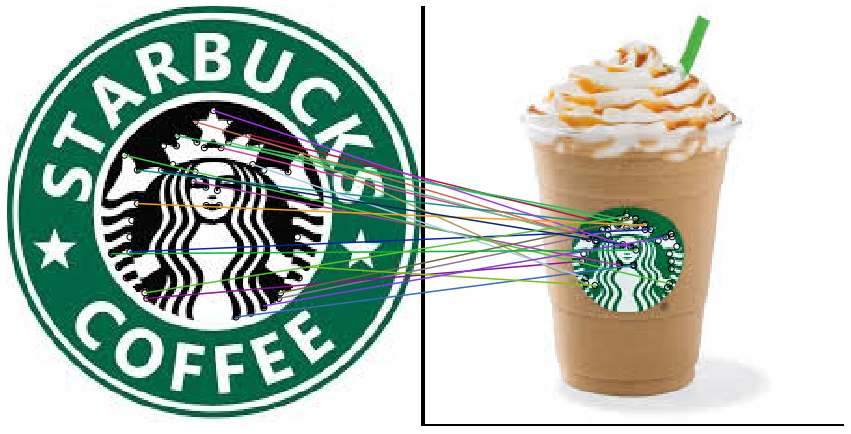

In [10]:
from skimage.color import rgba2rgb
from scipy.spatial.distance import hamming

starbucks_image = [
    rgba2rgb(io.imread("images/starbucks2.png")),
    io.imread("images/starbucks4.jpg"),
    io.imread("images/starbucks5.png"),
    io.imread("images/starbucks6.jpg"),
    io.imread("images/starbucksCup.jpg")
]

print(io.imread("images/starbucks2.png").shape)

"""
for image in starbucks_image:
    keypoints1, keypoints2, matches = get_ORB(image_model, image, n_keypoints=50)
    plot_matches(image_model, image, keypoints1, keypoints2, matches)
   """ 
def similarity(keypoints1, keypoints2, matches):
    m = len(matches)
    kp1 = len(keypoints1)
    kp2 = len(keypoints2)
    
    AoB = m + (kp1-m) + (kp2-m)
    
    return m/AoB
"""
If similarity_hamming yelds 1, it means that all the matches are similar ponints.
The closer to one the result is, the better result it will be.
"""
def similarity_hamming(matches, desc1, desc2, threshold):
    potential_similarities = np.array([hamming(desc1[i], desc2[i]) for i in range(0,len(desc1))])
    sim = potential_similarities[potential_similarities < threshold]
    
    if len(matches) == 0: return 0
    
    return len(sim)/len(matches)
    

data = []
for image in starbucks_image:
    keypoints1, keypoints2, matches,  desc1, desc2 = get_ORB(image_model, image, n_keypoints=50)
    sim = similarity(keypoints1, keypoints2, matches)
    data.append((image,sim, keypoints1, keypoints2, matches))
    
data.sort(key=lambda x:x[1], reverse=True)

for a in data:
    print(a[1])

#print the most similary image with similarity function
print("Similarity distance best match ")
plot_matches(image_model, data[0][0], data[0][2], data[0][3], data[0][4])
    

data2 = []
for image in starbucks_image:
    keypoints1, keypoints2, matches,  desc1, desc2 = get_ORB(image_model, image, n_keypoints=50)
    sim = similarity_hamming(matches, desc1, desc2, 0.5)
    data2.append((image,sim, keypoints1, keypoints2, matches))
    
data2.sort(key=lambda x:x[1], reverse=False)

for a in data2:
    print(a[1])
    
#print the most similar image with similarity_hamming
print("Hamming distances best match")
plot_matches(image_model, data2[0][0], data2[0][2], data2[0][3], data2[0][4])

**3.3** Repeate the experiment: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

**Help:** To do so, you can use the function given below as example:

```
import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)
```

or

```
tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)
```

Similarity:  0.26582278481012656
Hamming:  0.8571428571428571


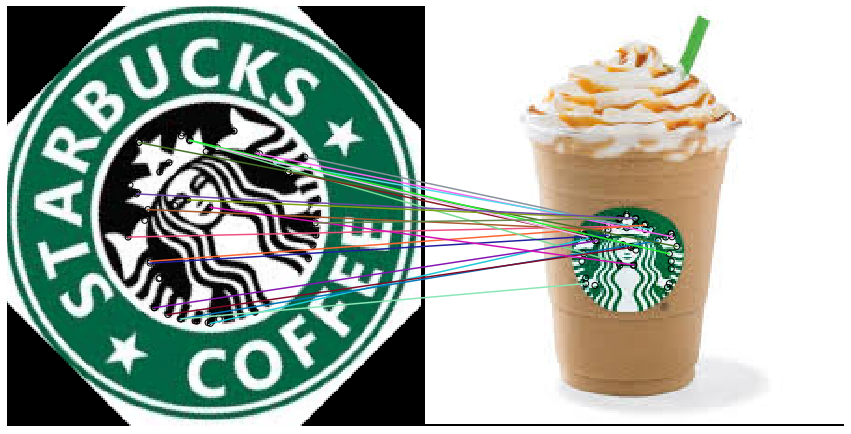

Similarity:  0.3157894736842105
Hamming:  1.25


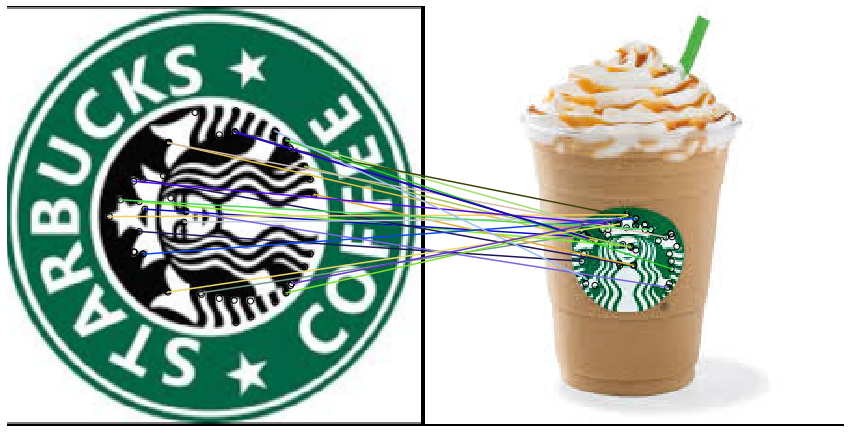

Similarity:  0.20481927710843373
Hamming:  1.2352941176470589


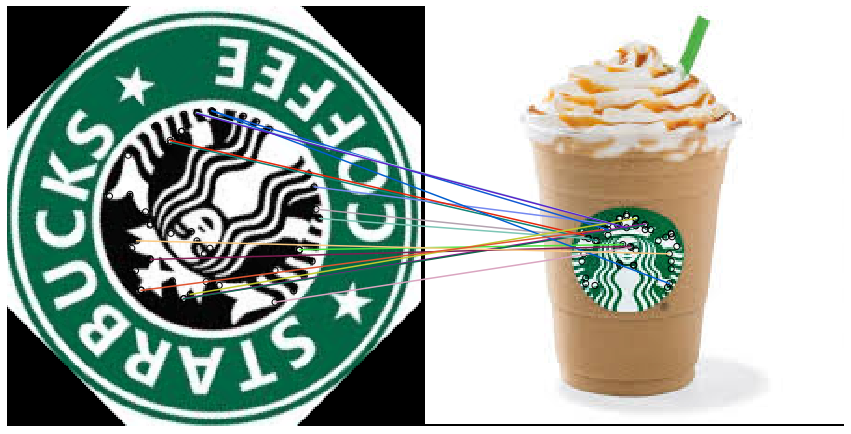

Similarity:  0.2987012987012987
Hamming:  0.8260869565217391


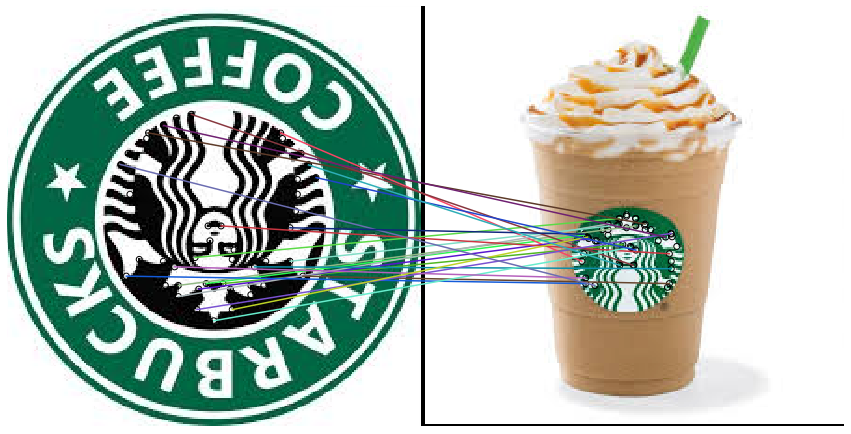

Similarity:  0.26582278481012656
Hamming:  0.8571428571428571


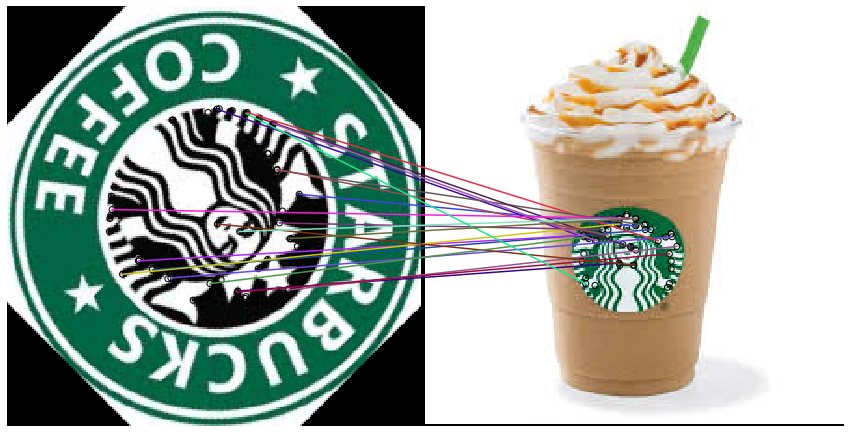

Similarity:  0.3157894736842105
Hamming:  1.1666666666666667


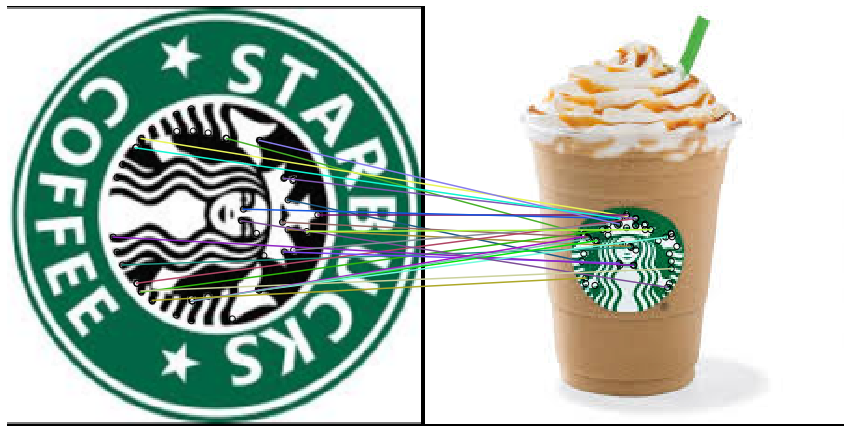

Similarity:  0.20481927710843373
Hamming:  1.2352941176470589


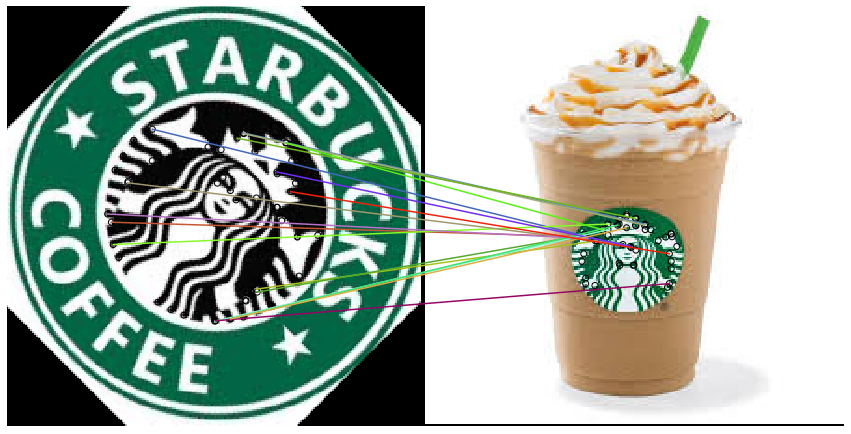

In [18]:
#we already know that orb is invariant under rotation, so we willobtain the same results.
import skimage.transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image_model, 45)

for i in range(45,360,45):
    img_rotated = tf.rotate(image_model, i)
    keypoints1, keypoints2, matches, desc1, desc2 = get_ORB(img_rotated, image, n_keypoints=50)
    print("Similarity: ", similarity(keypoints1, keypoints2, matches))
    print("Hamming: ", similarity_hamming(matches, desc1, desc2, 0.5))
    plot_matches(img_rotated, image, keypoints1, keypoints2, matches)

**(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



In [ ]:
# Your solution here

**3.4** Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

- HOG and template are not rotation invariant; ORB is rotation and scale invariant and it can be used in real time to detect features.
- TODO?????
- We can use the ratio (explained in class). We take the distance of the best match and we divide it between the second best match. If that ratio is high, it means the second match it's maybe a good match too, and if the ratio is low, the two best matches are similar, therefore they are both ok.

### Appendix

In [9]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)